In [49]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np
import itertools

# Natural Language Processing (NLP) Libraries
import nltk as nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.probability import FreqDist
import regex as re

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Machine Learning and Data Science Libraries
import sklearn
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

# Text Processing and Analysis
import spacy
from spacy.cli import download
download('en_core_web_sm')
from textblob import TextBlob
import swifter

# Word Cloud Generation
from wordcloud import WordCloud


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 14.4 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


<h3 style="color:#7a5138">Stage 1 -  Loading Datasets</h3>

| Dataset     | Size    | Source | URL |
| -----------| ----------- | ----------- |----------- |
| FakeNewsNet      | 44.1 MB     | GitHub |https://github.com/KaiDMML/FakeNewsNet |
| ISOT Dataset      | 116.4 MB |University of Victoria|https://onlineacademiccommunity.uvic.ca/isot/2022/11/27/fake-news-detection-datasets/ |

In [50]:
# Loading Datasets from the CSV's using pandas built function
# Data is collected from two different sources for Training, Validation and Testing Purposes

#FakeNewsNet Datasets
FakeNewsNet_Politifact_True = pd.read_csv("../Datasets/FakeNewsNet/politifact_real.csv")
FakeNewsNet_Politifact_Fake = pd.read_csv("../Datasets/FakeNewsNet/politifact_fake.csv")
FakeNewsNet_Gossipcorp_True = pd.read_csv("../Datasets/FakeNewsNet/gossipcop_real.csv")
FakeNewsNet_Gossipcorp_Fake = pd.read_csv("../Datasets/FakeNewsNet/gossipcop_fake.csv")

#ISOT Datasets
ISOT_Dataset_True = pd.read_csv("../Datasets/ISOT-dataset/True.csv")
ISOT_Dataset_Fake= pd.read_csv("../Datasets/ISOT-dataset/Fake.csv")

<p style=color:#38629C><b style=color:#467200>Dataset  1 - FakeNewsNet Dataset: </b>This dataset includes News classified as fake or true by specialized organizations such as Gossipcop and Politifact. Datasets are divided into four different files:</p>
<ul style=color:#38629C>
<li>Politifact Real – Real news collected from Politifact</li>
<li>Politifact Fake – Fake news collected from Politifact</li>
<li>Gossipcop Real – Real news collected from Gossipcop</li>
<li>Gossipcop Fake  – Fake news collected from Gossipcop</li>
</ul>
<p style=color:#38629C>There are 23,196 records in total, with the distribution under each file as follows:</p>
<ul style=color:#38629C>
<li>Politifact Real – 624 Records</li>
<li>Politifact Fake – 432 Records</li>
<li>Gossipcop Real – 16,817 Records</li>
<li>Gossipcop Fake  – 5,323 Records</li>
</ul>

<p style=color:#467200> There are more real news collected in comparison to the fake news. This may be because fact-checking organizations prioritize verifying claims in popular stories which tend to be real news stories.</p>

<p style=color:#38629C>The columns and its nature are as follow: </p>

<ul style=color:#38629C>
<li>id – Identifier for the row in the dataset.</li>
<li>url – URL of the website published the article.</li>
<li>title – Title of the news article.</li>
<li>tweet_ids –  Twitter ids involved in sharing the news.</li>
</ul>



In [51]:
FakeNewsNet_Politifact_True

,id,news_url,title,tweet_ids
0,politifact14984,http://www.nfib-sbet.org/,National Federation of Independent Business,967132259869487105\t967164368768196609\t967215...
1,politifact12944,http://www.cq.com/doc/newsmakertranscripts-494...,comments in Fayetteville NC,942953459\t8980098198\t16253717352\t1668513250...
2,politifact333,https://web.archive.org/web/20080204072132/htt...,"Romney makes pitch, hoping to close deal : Ele...",NaN
3,politifact4358,https://web.archive.org/web/20110811143753/htt...,Democratic Leaders Say House Democrats Are Uni...,NaN
4,politifact779,https://web.archive.org/web/20070820164107/htt...,"Budget of the United States Government, FY 2008",89804710374154240\t91270460595109888\t96039619...
...,...,...,...,...
619,politifact14731,https://www.flake.senate.gov/public/index.cfm/...,Flake: “Religious tests should have no place i...,NaN
620,politifact329,https://web.archive.org/web/20080131000131/htt...,Change We Can Believe In,634287923135909888\t946743411100536832\t946816...
621,politifact1576,http://www.youtube.com/watch?v=4O8CxZ1OD58,deputy director of national health statistics ...,NaN
622,politifact4720,http://www.youtube.com/watch?v=EhyMplwY6HY,Romneys ProLife Conversion Myth or Reality Jun...,188871706637647874


In [52]:
FakeNewsNet_Gossipcorp_True

,id,news_url,title,tweet_ids
0,gossipcop-882573,https://www.brides.com/story/teen-mom-jenelle-...,Teen Mom Star Jenelle Evans' Wedding Dress Is ...,912371411146149888\t912371528343408641\t912372...
1,gossipcop-875924,https://www.dailymail.co.uk/tvshowbiz/article-...,Kylie Jenner refusing to discuss Tyga on Life ...,901989917546426369\t901989992074969089\t901990...
2,gossipcop-894416,https://en.wikipedia.org/wiki/Quinn_Perkins,Quinn Perkins,931263637246881792\t931265332022579201\t931265...
3,gossipcop-857248,https://www.refinery29.com/en-us/2018/03/19192...,I Tried Kim Kardashian's Butt Workout & Am For...,868114761723936769\t868122567910936576\t868128...
4,gossipcop-884684,https://www.cnn.com/2017/10/04/entertainment/c...,Celine Dion donates concert proceeds to Vegas ...,915528047004209152\t915529285171122176\t915530...
...,...,...,...,...
16812,gossipcop-891749,https://omgcheckitout.com/2017-hollywood-film-...,2017 Hollywood Film Awards: The Complete List ...,927385466357260288\t927386601034010625\t927387...
16813,gossipcop-941486,https://pagesix.com/2018/06/04/jada-pinkett-sm...,Jada Pinkett Smith explains why son Jaden move...,1004044947006386178\t1004045964401889285\t1004...
16814,gossipcop-953143,https://www.etonline.com/tinsley-mortimer-reac...,Tinsley Mortimer Reacts to Luann de Lesseps' R...,1019924845889572864\t1019925702676709377\t1019...
16815,gossipcop-954366,https://www.healthbreakingnews.net/2018/07/pri...,Prince Harry Carries on Princess Diana’s Legac...,1021766291139584000\t1021772054599802880\t1021...


In [53]:
FakeNewsNet_Politifact_Fake

,id,news_url,title,tweet_ids
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...
3,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,886941526458347521\t887011300278194176\t887023...
4,politifact15371,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,915205698212040704\t915242076681506816\t915249...
...,...,...,...,...
427,politifact14944,http://thehill.com/homenews/senate/369928-who-...,Who is affected by the government shutdown?,954602090462146560\t954602093171609600\t954650...
428,politifact14071,https://web.archive.org/web/20170322070001/htt...,Lindsey Graham Threatens To Convert To Democra...,740351669834244096\t740391312277573632\t740474...
429,politifact13577,http://archive.is/DQqCx,ELECTORAL COLLEGE ELECTOR COMMITS SUICIDE TO A...,810939651900907520\t814738996706164737\t814917...
430,politifact13560,politicono.com/palin-calls-boycott-mall-americ...,Sarah Palin Calls To Boycott Mall Of America B...,805216591424212993\t805222830023540736\t805223...


In [54]:
FakeNewsNet_Gossipcorp_Fake

,id,news_url,title,tweet_ids
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...
4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...
...,...,...,...,...
5318,gossipcop-6702260693,www.huffingtonpost.com/2012/09/11/september-11...,September 11: Celebrities Remember 9/11 (TWEETS),245643768638894080
5319,gossipcop-6051845337,www.dailymail.co.uk/news/article-4915674/NASCA...,NASCAR owners threaten to fire drivers who pro...,912048333413330944\t912048571482087424\t912049...
5320,gossipcop-2435526162,www.telegraph.co.uk/men/the-filter/7-signs-dav...,The 7 signs that David Beckham is definitely h...,897794716447539200\t897804460830928896\t897842...
5321,gossipcop-4576152851,www.vanityfair.com/style/2016/09/ryan-gosling-...,Ryan Gosling and Eva Mendes Did Not Get Marrie...,778678901572710400\t778681718714740736\t778683...


<p style=color:#38629C>All four files discussed above will be combined together, therefore, there is need to add label based on the type of data presented in the files</p>

In [55]:
# Adding label "true" to both FakeNewsNet_Politifact_True and FakeNewsNet_Gossipcorp_True

FakeNewsNet_Politifact_True["label"] = str("true")
FakeNewsNet_Gossipcorp_True["label"] = str("true")

In [56]:
# Adding label "fake" to both FakeNewsNet_Politifact_True and FakeNewsNet_Gossipcorp_True
FakeNewsNet_Gossipcorp_Fake["label"] = str("fake")
FakeNewsNet_Politifact_Fake["label"] = str("fake")


<p style=color:#38629C>Now Labels are added to each datasets, therefore, these will be combined together for preprocessing and cleaning.</p>

In [57]:
# Concatenating the FakeNewsNet_Politifact_True, FakeNewsNet_Gossipcorp_True, FakeNewsNet_Politifact_Fake and FakeNewsNet_Gossipcorp_Fake
FakeNewsNet_Combined = pd.concat([FakeNewsNet_Politifact_True, FakeNewsNet_Gossipcorp_True, FakeNewsNet_Politifact_Fake, FakeNewsNet_Gossipcorp_Fake])

In [58]:
FakeNewsNet_Combined

,id,news_url,title,tweet_ids,label
0,politifact14984,http://www.nfib-sbet.org/,National Federation of Independent Business,967132259869487105\t967164368768196609\t967215...,true
1,politifact12944,http://www.cq.com/doc/newsmakertranscripts-494...,comments in Fayetteville NC,942953459\t8980098198\t16253717352\t1668513250...,true
2,politifact333,https://web.archive.org/web/20080204072132/htt...,"Romney makes pitch, hoping to close deal : Ele...",NaN,true
3,politifact4358,https://web.archive.org/web/20110811143753/htt...,Democratic Leaders Say House Democrats Are Uni...,NaN,true
4,politifact779,https://web.archive.org/web/20070820164107/htt...,"Budget of the United States Government, FY 2008",89804710374154240\t91270460595109888\t96039619...,true
...,...,...,...,...,...
5318,gossipcop-6702260693,www.huffingtonpost.com/2012/09/11/september-11...,September 11: Celebrities Remember 9/11 (TWEETS),245643768638894080,fake
5319,gossipcop-6051845337,www.dailymail.co.uk/news/article-4915674/NASCA...,NASCAR owners threaten to fire drivers who pro...,912048333413330944\t912048571482087424\t912049...,fake
5320,gossipcop-2435526162,www.telegraph.co.uk/men/the-filter/7-signs-dav...,The 7 signs that David Beckham is definitely h...,897794716447539200\t897804460830928896\t897842...,fake
5321,gossipcop-4576152851,www.vanityfair.com/style/2016/09/ryan-gosling-...,Ryan Gosling and Eva Mendes Did Not Get Marrie...,778678901572710400\t778681718714740736\t778683...,fake


<p style=color:#38629C> We can validate that the combined record is exactly matching with the individual dataset
</p>

<ul style=color:#38629C>
    <li> FakeNewsNet_Politifact_True  : 624 rows × 5 columns</li>
    <li> FakeNewsNet_Politifact_Fake  : 432 rows × 5 columns</li>
    <li> FakeNewsNet_Gossipcorp_True  : 16,817 rows × 5 columns</li>
    <li> FakeNewsNet_Gossipcorp_Fake  : 5,323 rows × 5 columns</li>
    <li style=color:#467200 > FakeNewsNet_Combined  : 23,196 rows × 5 columns</li>
</ul>

<p style=color:#38629C><b style=color:#467200 >Dataset  2 - ISOT Fake Dataset : </b> This dataset contains two kinds of data (i.e. Fake and Real) similar to FakeNewsNet. Real news articles in this dataset are collected from Reuters.com using website crawlers and Fake news articles are collected from PilitiFact and Wikipedia. The dataset is divided into two different files:</p>

<ul style=color:#38629C>
<li>True – Real news collected from Reuters.com</li>
<li>Fake – Fake news collected from Politifact and Wikipedia</li>
</ul>

<p style=color:#38629C>Article is related to the period from 2016 till 2017 and there are 44,898 records in total with almost equal distribution among fake and real news:
<ul style=color:#38629C>
<li>True – 21,417 Records</li>
<li>Fake – 23,418 Records</li>
</ul>

<p style=color:#467200>This will help us in avoiding overfitting because of balanced distribution of fake and real news.</p>



<p style=color:#38629C>The columns and its nature is as follow: </p>

<ul style=color:#38629C>
<li>title – Title of the news article</li>
<li>text – Text of the news articles published</li>
<li>subject – It’s tagging for the type of article (Political News, News etc)</li>
<li>date –  Date on which news article was published</li>
</ul>



<p style=color:#467200> This Datasets is more inclined towards actual news instead short text tweets posted by the users.Since, both datasets will be combined, therefore, there is need to tag the news either as "Fake" and "True"</p>

In [59]:
ISOT_Dataset_True

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [60]:
ISOT_Dataset_Fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


<p style=color:#38629C> Adding label fake and true to the datasets and combining both datasets together</p>

In [61]:
#Adding label to the datasets for better identification
ISOT_Dataset_True["label"] = str("true")
ISOT_Dataset_Fake["label"] = str("fake")

In [62]:
# Combing both datasets together to before preprocessing and cleaning both datasets [ISOT and FakeNewsNet]
ISOT_Dataset_Combined = pd.concat([ISOT_Dataset_True, ISOT_Dataset_Fake])


In [63]:
ISOT_Dataset_Combined

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",fake
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",fake
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",fake
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",fake


<p style=color:#38629C> We can Validate that the combined record is exactly matching with the individual dataset (i.e. ISOT_Datatset_True and ISOT_Dataset_Fake)
</p>

<ul style=color:#38629C>
    <li> ISOT_Datatset_True  : 21,417 rows × 4 columns</li>
    <li> ISOT_Datatset_Fake  : 23,481 rows × 4 columns</li>
    <li style=color:#467200 > ISOT_Dataset_Combined  : 44,898 rows × 5 columns</li>
</ul>

<h3 style="color:#7a5138">Stage 2 -  Data Cleaning and Preprocessing</h3>

<p style=color:#38629C><b style=color:#467200>1. Combining Datasets :</b> First of All, we have too combine both datasets together before performing any preprocessing. The Columns in both Datasets and its representation are as follows:</p>

<ul style=color:#38629C>
    <li> Title</li> 
    <li> Text</li> 
    <li> Label</li>
</ul>

<p style=color:#38629C>There is no Text field in FakeNewsNet, therefore, both Tile and Text will be combined once both FakeNewsNet and ISOT datasets merged together. Title and Text are also combined together as both are interrelated and it is not available in FakeNewsNet dataset.</p>

In [64]:
#Concatenating the FakeNewsNet_Combined and ISOT_Dataset_Combined to new dataset named as "Combined_Dataset" before preprocessing and cleaning both datasets. 
#Columns combined into a single dataset are title, text and label.
Combined_Dataset = pd.concat([FakeNewsNet_Combined[['title', 'label']], ISOT_Dataset_Combined[['title','label','text']]], ignore_index=True)



In [65]:
#Since, Text is only included in the ISOT dataset, therefore, it is kept as blank. 
Combined_Dataset['text'] = Combined_Dataset['text'].fillna("")

#NAN has been eliminated by keeping it as Blank
Combined_Dataset

,title,label,text
0,National Federation of Independent Business,true,
1,comments in Fayetteville NC,true,
2,"Romney makes pitch, hoping to close deal : Ele...",true,
3,Democratic Leaders Say House Democrats Are Uni...,true,
4,"Budget of the United States Government, FY 2008",true,
...,...,...,...
68089,McPain: John McCain Furious That Iran Treated ...,fake,21st Century Wire says As 21WIRE reported earl...
68090,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,fake,21st Century Wire says It s a familiar theme. ...
68091,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,fake,Patrick Henningsen 21st Century WireRemember ...
68092,How to Blow $700 Million: Al Jazeera America F...,fake,21st Century Wire says Al Jazeera America will...


In [66]:
#Merging both columns title and text columns with each other for the training purposes because both are interlinked with each other.
Combined_Dataset['title_text'] = Combined_Dataset['title'] + ' ' + Combined_Dataset['text']

#Since, we have combined title and text, therefore, we can opt to drop these individual columns from datasets as these are not required and it will also make our dataset smaller.
Combined_Dataset = Combined_Dataset.drop(['title', 'text'], axis=1)

In [67]:
Combined_Dataset

,label,title_text
0,true,National Federation of Independent Business
1,true,comments in Fayetteville NC
2,true,"Romney makes pitch, hoping to close deal : Ele..."
3,true,Democratic Leaders Say House Democrats Are Uni...
4,true,"Budget of the United States Government, FY 2008"
...,...,...
68089,fake,McPain: John McCain Furious That Iran Treated ...
68090,fake,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
68091,fake,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
68092,fake,How to Blow $700 Million: Al Jazeera America F...


In [68]:
Combined_Dataset.isnull().sum()

label         0
title_text    0
dtype: int64

In [69]:
Combined_Dataset.count()

label         68094
title_text    68094
dtype: int64

<p style=color:#38629C>There is no null value or missing record in the final dataset. However, unwanted columns are dropped for clarity and to make the dataset smaller.</p>

<p style=color:#38629C><b style=color:#38629C>2. Checking Duplicate Records :</b> This step involve checking the duplicate records to ensure the followings:</p>

<ul style=color:#38629C>
    <li> Since, two datasets are combined with each other so there are chances of having a duplicate records.</li> 
    <li> There are also chances of having duplicated records in same dataset.</li> 
</ul>

In [70]:
#Identifying the number of the duplicates records from the data frame
Duplicate_Records = Combined_Dataset.duplicated(subset=['title_text'], keep='first')
print("Duplicate record count:")
print(Duplicate_Records.groupby(Duplicate_Records).count())

Duplicate record count:
False    60829
True      7265
dtype: int64


<p style=color:#38629C>There are 7,265 records which are duplicated and needs to be removed from the dataset and 60,829 records are unique.</p>
<p style=color:#467200 > Original Dataset [68,094 rows] <b>-</b> Duplicate Records [7,265 rows] <b>=</b> Cleaned Dataset [60,829 rows] </p>

In [71]:
#Removing the duplicate records from the data frame.
Combined_Dataset = Combined_Dataset[~Duplicate_Records]
Combined_Dataset

,label,title_text
0,true,National Federation of Independent Business
1,true,comments in Fayetteville NC
2,true,"Romney makes pitch, hoping to close deal : Ele..."
3,true,Democratic Leaders Say House Democrats Are Uni...
4,true,"Budget of the United States Government, FY 2008"
...,...,...
67311,fake,The White House and The Theatrics of ‘Gun Cont...
67312,fake,Activists or Terrorists? How Media Controls an...
67313,fake,"BOILER ROOM – No Surrender, No Retreat, Heads ..."
67314,fake,Federal Showdown Looms in Oregon After BLM Abu...


<p style=color:#38629C><b style=color:#467200>2. Converting text to String :</b> Currently datatype of text_title column is object. This should be converted into string for further text related cleaning activities.</p>

In [72]:
#Dataframe is copied to avoid the issue of "SettingWithCopyWarning"
Combined_Dataset = Combined_Dataset.copy()
#text_title is changes to string from object
Combined_Dataset['title_text'] = Combined_Dataset['title_text'].astype("string")

In [73]:
Combined_Dataset.dtypes

label                 object
title_text    string[python]
dtype: object

In [74]:
#Function to Print the dataset rows as text to observe the data
from typing import Union

def print_dataset(ds: Union[pd.DataFrame, pd.Series], counts: int, txt: str, tail: bool = False):
    j = 0
    if tail:
        data_subset = ds.tail(counts)
    else:
        data_subset = ds.head(counts)
    
    for i in data_subset[txt]:
        j += 1
        print(j, "=>", i)
        print()

In [75]:
#Getting last 10 records from the dataset
print_dataset(Combined_Dataset,10,"title_text", tail=True)

1 => McPain: John McCain Furious That Iran Treated US Sailors Well 21st Century Wire says As 21WIRE reported earlier this week, the unlikely  mishap  of two US Naval vessels straying into Iranian waters   just hours before the President s State of the Union speech, followed by the usual parade of arch-neocons coming on TV in real time to declare the incident as  an act of aggression  by Iran against the United States   is no mere coincidence.24 hours after the incident, the Iranians returned all 11 US sailors, unharmed and in good spirits. The only remaining casualty from this event was an incident of a common condition in Washington known as  Pre-Traumatic Stress Disorder    suffered by a certain US Senator was mortified by the uneventful outcome which followed Daniel McAdams Ron Paul Institute  The two US Navy riverine command boats intercepted in Iranian territorial waters yesterday were sent on their way along with the crew of 10 US sailors after brief detention on Iranian soil.Acc

<p style=color:#38629C><b style=color:#467200 >3. Removing Unwanted text :</b> I have noted that there is unwanted text in the articles such as HTTP links (e.g. https://t.co/EmFjBw9uC1) to external sources like twitter or link to pics posted in social media e.g (pic.twitter.com/HDea8ujTPt). These should be removed to clean the text. </p>

In [76]:
def remove_unwanted_text(text):
    text = re.sub(r'http\S+', '', text) # remove http links
    text = re.sub(r"\bpic\.[^\s]+\b", "", text) # remove pics links
    text = re.sub(r"\bvid\.[^\s]+\b", "", text) # remove vids links
    text = re.sub(r"\b\d+(\.\d+)?\b", "", text) # remove numbers
    text = re.sub(r'@[A-Za-z0-9]+', ' ', text) # remove @mentions - It is commonly used
    text = re.sub(r'\$\w*', '', text) # remove $ symbols
    text = re.sub(r'\#\w+', ' ', text) # remove hashtags - These are provided for twitter
    text = re.sub(r'_', ' ', text) # remove Underscore
    text = re.sub(r"\.+", "", text) # Removing full stops (. or .. or ..+)
    #Returning clean text
    return text


In [77]:
#Testing the unwanted text removal function
sentance = '''Good muffins``cost $3.88\nin '%%!the New York. #DraftReport #FinalProject Please buy me
... two 's of them having green apple colour stock. pic.twitter.com/HDea8ujTPt\n\n
Thanks. @UOL :) $127.2 _, https://london.ac.uk/ https://t.co/EmFjBw9uC1 {}''' 
sentance = remove_unwanted_text(sentance)
sentance

"Good muffins``cost \nin '%%!the New York     Please buy me\n two 's of them having green apple colour stock \n\n\nThanks   :)   ,   {}"

In [78]:
#Applying the unwanted text removal function to FakeNewsNet_ISOT_Combined
Combined_Dataset['title_text'] = Combined_Dataset['title_text'].apply(remove_unwanted_text)

<p style=color:#38629C><b style=color:#467200>4. Removing Stopwords, Punctuations and Emojies :</b> It is quite common in the news articles to have stopwords, emojies or punctuations. Therefore, this step will involve removing all such things from the dataset to make it more focused and readable for the machine.</p>

In [79]:
emojis = set([
':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}', ':^)', 
':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D', '=-3', '=3', ':-))', 
":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P', 'x-p', 'xp', 'XP', ':-p', ':p', 
'=p', ':-b', ':b', '>:)', '>;)', '>:-)', '<3'':L', ':-/', '>:/', ':S', '>:[', 
':@', ':-(', ':[', ':-||', '=L', ':<', ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", 
":'(", ':\\', ':-c', ':c', ':{', '>:\\', ';('
])

In [80]:
#There are multiple libraries to perform this task such as Spacy, NLTK, SKlearn etc.
#I have used NLTK library because the results are almost close to the Spacy.
stop_words = (stopwords.words('english'))
punctuation = '''!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'s“``–‘’0123456789''' #Used to remove punctuations.
def remove_stopwords_punch(text):
    # Word tokenization for the text parsed into the function
    word_tokens = word_tokenize(text)
    #Check for the stop_words and removing from the text
    filtered_stop_words = [w for w in word_tokens if not w.lower() in stop_words] #Checking for the punctuation and removing from the text
    filtered_punch_words = [w for w in filtered_stop_words if not w in punctuation] #Checking for the emojis and removing from the text
    filtered_emoj_words = [w for w in filtered_punch_words if not w in punctuation] #Joining the words again for input to dataframe column
    return(' '.join(filtered_emoj_words))

In [81]:
#Testing the stop word and punctuation removal function
remove_stopwords_punch(sentance)

'Good muffins cost New York Please buy two green apple colour stock Thanks'

In [82]:
#Applying the stop word and punctuation removal function to Combined dataset
Combined_Dataset['title_text'] = Combined_Dataset['title_text'].apply(remove_stopwords_punch)

In [83]:
print_dataset(Combined_Dataset,5,"title_text", tail=True)

1 => White House Theatrics Gun Control 21st Century Wire says world stage men women merely players exits entrances one man time plays many parts acts seven ages William Shakespeare Theatrics politics nothing new latest TV drama little over-the-top even entertainer-and-chief HIGH DRAMA Obama epic tears gun control rally TuesdayDuring President Barack Obama landmark New Year TV address gun control grew visibly emotional invoking Newtown bountiful tears arriving good measureWhile right-wing commentators incensed left-wing media pundits understandably blown away performance commented like performance media terms weird moment say leastOf course one would dare accuse President producing tears demand would impossible fake unless course extremely talented trained actor would believe President would received sort special coaching reserved professional TV film actorsThe thought simply preposterous right President surely actor Nonetheless high drama sure something seemed incredibly staged morning

<p style=color:#38629C><b style=color:#467200>5. Making text to lower case :</b> The text is now converted to lower case to make it consistent and to reduce the dimensionality of the data because same word in different case could be considered as a different feature.</p>

In [84]:
# Making the text_title to lower case for consistency and to avoid the multiple occurences of the same words.
Combined_Dataset['title_text'] = Combined_Dataset['title_text'].str.lower()


<p style=color:#38629C><b style=color:#467200>6. Lemmatizing the text :</b> Text is lemmatized to convert the text to its base, root or dictionary form.</p>

In [85]:
#Stemming and lemmatizing the title_text
lemmatizer = WordNetLemmatizer()
nlp = spacy.load('en_core_web_sm')

#Function to stem the sentences of the dataframe [title_text]
def lemmatize_data(text:str) -> str:
    """Lemmatize a string of text.
    Args:
        text: The string of text to lemmatize.
    Returns:
        The lemmatized string of text.
    """
    # Load the English language model for spacy for lemmatizing the title_text
    doc = nlp(text)  # Process the text with Spacy
    lem_words = [token.lemma_ for token in doc]  # Lemmatize each token in the processed text
    return(' '.join(lem_words))


In [86]:
#Testing the function to lemmatize  wordings
sentance = "A letter has been written, asking him to be released"
lemmatize_data(sentance)

'a letter have be write , ask he to be release'

In [87]:
# Applying stemming and lemmatization  to Combined dataset.
Combined_Dataset['title_text'] = Combined_Dataset['title_text'].swifter.apply(lemmatize_data)

Pandas Apply: 100%|██████████| 60829/60829 [27:05<00:00, 37.41it/s] 


<p style="color:#38629C"><b style="color:#467200">7. Rechecking the duplicate records :</b> It is always best practice to recheck the text after completing all preprocessing and cleaning tasks because there might be chances of having duplicate records again.</p>

In [88]:
#Final Check for the duplicate records
Duplicate_Records = Combined_Dataset.duplicated(subset=['title_text'], keep='first')
print("Duplicate record count:")
print(Duplicate_Records.groupby(Duplicate_Records).count())

Duplicate record count:
False    60736
True        93
dtype: int64


<p style="color:#38629C"> There are few duplicate records that needed to be eliminated from the dataset.</p>

In [89]:
#Removing the duplicate records from the data frame.
Combined_Dataset = Combined_Dataset[~Duplicate_Records]
Combined_Dataset

,label,title_text
0,true,national federation independent business
1,true,comment fayetteville nc
2,true,romney make pitch hope close deal election roc...
3,true,democratic leader say house democrats united g...
4,true,budget united states government fy
...,...,...
67311,fake,white house theatrics gun control 21st century...
67312,fake,activist terrorist medium control dictate narr...
67313,fake,boiler room surrender retreat head roll ep tun...
67314,fake,federal showdown looms oregon blm abuse local ...


In [90]:
record = Combined_Dataset.iloc[45934]

print(record)

label                                                      fake
title_text    viola davis give profound insight racial tensi...
Name: 47711, dtype: object


<h3 style="color:#7a5138"> Stage 3 - Dataframe Outlook</h3>

<li style=color:#38629C>Distribution of fake and real news from the combined dataset</li>

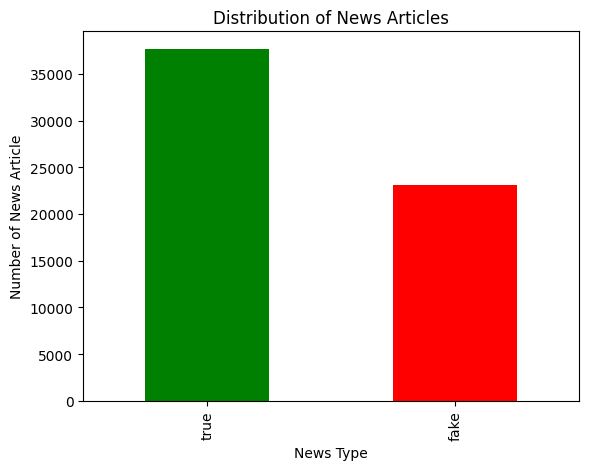

label
true    37654
fake    23082
Name: label, dtype: int64

In [91]:
#Checking the distribution of combined datasets based on news label
df_news = Combined_Dataset.groupby('label')['label'].count()
df_news = df_news.sort_values(ascending = False) # Keeping the values in ascending order
bar_colors = list('grbkymc') #red, green, blue, black, etc.
df_news.plot(x = df_news[0], y= df_news[1], kind = 'bar', stacked=True, color=bar_colors)
# To add title and labels to the plot
plt.title('Distribution of News Articles') 
plt.ylabel('Number of News Article') 
plt.xlabel('News Type')
plt.show() 
#To show the distribution based on count
df_news

<li style=color:#38629C>Length of the number of words in the sentence for fake and real news articles</li>

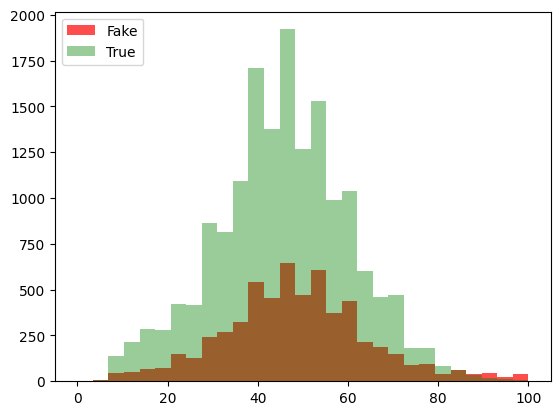

In [92]:
#Bucket size for the histogram
bins = np.linspace(0, 100, 30)
#To create a copy of the dataset because new column is added, it is good practice to do copy before preprocessing
df_news = Combined_Dataset.copy()

df_news['text_length'] = df_news["title_text"].apply(lambda x: len(x) - x.count(" "))

plt.hist(df_news[df_news["label"]== "fake"]["text_length"], bins, alpha=0.7, label="Fake", color="red")
plt.hist(df_news[df_news["label"]== "true"]["text_length"], bins, alpha=0.4, label="True", color="green")
plt.legend(loc="upper left")
plt.show()


<li style=color:#38629C>Checking the frequency of words</li>

Pandas Apply: 100%|██████████| 60736/60736 [00:17<00:00, 3476.75it/s] 


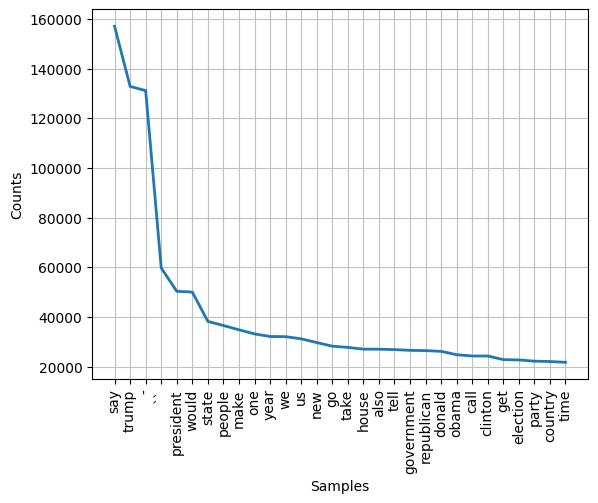

<Axes: xlabel='Samples', ylabel='Counts'>

In [93]:
#Checking the frequency of words in dataset 
#Using itertools for efficiency reason as tokens could be huge in the combined dataset
def word_frequency(text):
    word_tokens = word_tokenize(text) # Getting word token for the text parse 
    return word_tokens #Returning word tokens

# Making a list of words currently being used 
f = list(itertools.chain.from_iterable(Combined_Dataset['title_text'].swifter.apply(word_frequency))) 

result = FreqDist(f)

result.plot(30, cumulative=False)

<li style=color:#38629C>Word Cloud for the Frequent Words</li>

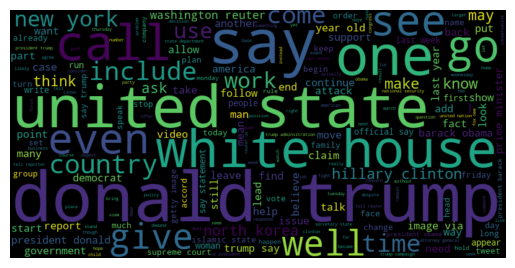

In [95]:
combined_text = ' '.join([t for t in Combined_Dataset['title_text']])
wordCloud = WordCloud(width=800, height=400, random_state=35, max_font_size=110).generate(combined_text)
plt.imshow(wordCloud, interpolation='bilinear') 
plt.axis('off')
plt.show()

<p style=color:#38629C>The news article mainly relates to the political and social issues. However, there are some other interesting words are also mentioned in large numbers such as say , time, year etc </p>

<li style=color:#38629C>Feature Extraction using CountVectorizer</li>

<p style=color:#38629C>Features will be extracted from the dataset and words will be extracted for both fake and real news articles.</p>

In [96]:
from sklearn.feature_extraction.text import CountVectorizer

#Count vector to convert the collection of text to a matrix showing the frequency of word in a document
vec=CountVectorizer(stop_words='english')
vec.fit(Combined_Dataset['title_text'])

#Creating a document-term matrix for the title_text
text_encoded=vec.fit_transform(Combined_Dataset['title_text'])

In [97]:
text_encoded

<60736x158126 sparse matrix of type '<class 'numpy.int64'>'
	with 5574610 stored elements in Compressed Sparse Row format>

In [98]:
# sum for each column in the sparse matrix (0 is to calculate it vertically)
sum_sparse_matrix = text_encoded.sum(axis=0)
# Getting a row array from the sparse matrix
arr = np.asarray(sum_sparse_matrix).squeeze()
# Getting 1d numpy array with the squeeze function to eliminate the extra dimension
text_encoded_arr = np.asarray(arr).reshape((arr.size,))

text_encoded_arr

array([1, 8, 5, ..., 1, 1, 1])

In [100]:
term_count=zip(text_encoded_arr, vec.get_feature_names_out())

sorted_term_count=sorted(list(term_count), reverse=True)


In [101]:
top_terms_counts=[tc[0] for tc in sorted_term_count[:10]] #Getting top 10 terms counts
top_terms=[t[1] for t in sorted_term_count[:10]] #Getting top 10 terms
term_df=pd.DataFrame(text_encoded.toarray(), columns=vec.get_feature_names_out())
term_df['label']=Combined_Dataset['label']

In [ ]:
top_terms_counts

[157128, 132932, 50399, 38298, 36702, 36619, 34894, 29761, 27110, 26920]

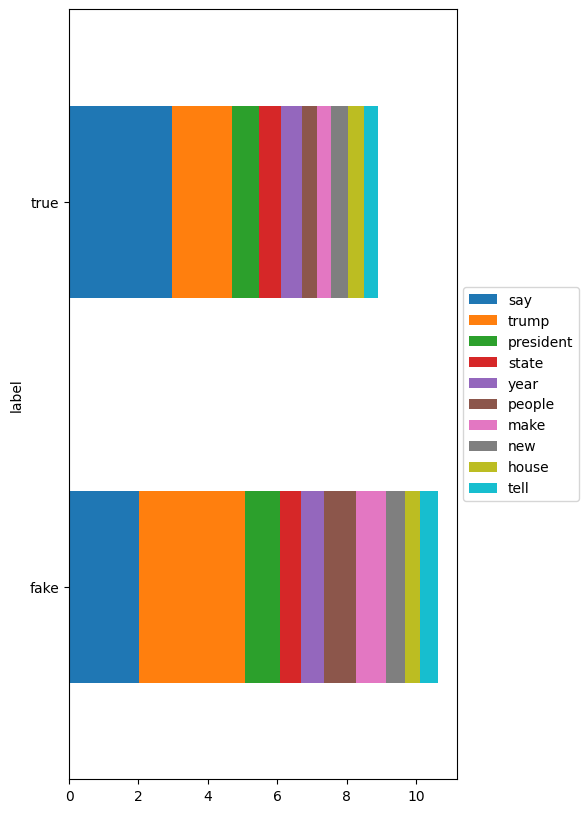

In [102]:
term_df[top_terms+['label']].groupby('label').mean().plot(kind='barh', stacked=True, figsize=(5, 10)) 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<p style=color:#38629C>We can see that, as in the word frequency or word cloud, terms such as 'Trump, say, president etc' are used in both fake and real news to deceive readers. This could be a challenge for our models to achieve optimal accuracy, as the same words are used in almost similar proportions in both types of news. However, it is expected that the model based on Naive Bayes and Advance Transformers could perform well.</p>

<h3 style="color:#7a5138"> Stage 4 - Splitting and Exporting dataset</h3>

<p style="color:#38629C"><b style="color:#467200">1. Exporting Training data to CSV:</b> Cleaned Data is exported to CSV as this will be used separately in Google Colab for Deep Neural Networks including LSTM Deep, Bert (Classifier - Zero/Few Shots) and Bert (Fine Tuning) .</p>

In [ ]:
#Pandas dataframe to CSV
FakeNewsNet_ISOT_Combined.to_csv('../cleaned_data.csv', index=False)

<p style="color:#38629C"><b style="color:#467200">2. Split data into Training and Testing [Training: 80%, Testing:20%] :</b> Dataset is splitted into X_train, X_test, y_train, y_test using Sk-Learn library with the ratio 80% - Training and 20% Testing.</p>


In [104]:
#Pandas dataframe to CSV
# FakeNewsNet_ISOT_Combined.to_csv('cleaned_data.csv', index=False)

from sklearn.model_selection import train_test_split

# Splitting the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(Combined_Dataset['title_text'], Combined_Dataset['label'], test_size=0.2, random_state=42)


In [105]:
count:dict = {}

count['X_train'] = X_train.count()
count['X_test'] = X_test.count()
count['y_train'] = y_train.count()
count['y_test'] = y_test.count()
count['Total'] = X_train.count()+X_test.count()

for key, value in count.items():
    print(key, ":", value)


X_train : 48588
X_test : 12148
y_train : 48588
y_test : 12148
Total : 60736


You can notice that same length of documents divided into feature and label by the SKlearn class

|      | Train    | Test 
| -----------| ----------- | ----------- |
| x      | 48,588      | 12,148 |
| y      | 48.588 |12,148|


<h3 style="color:#362419"> Stage 5 -  Feature Extraction</h3>

<p style=color:#467200><b>1. Tokenization</b></p>
<ul style=color:#38629C>
    <li>Tokenization is the process of dividing the text into "sentences, words or alphabets".</li>
    <li>There are multiple methods for tokenization and almost all libraries such as NLTK, keras, spaCy have capabilities of performing tokenization.</li>
    <li>NLTK tokenizer is used during preprocessing and cleaning of the Datasets. Therefore, we will continue to use the same during this stage.</li>
    <li>There is a separate function created for tokenization using the "word_tokenize" method from NLTK.</li>
    <li>Example:</li>
    <ul>
        <li>"Natural language processing is fun to learn" <b>Tokenize to</b></li>
        <li>"Natural" "language" "processing" "is" "fun" "to" "learn"</li>
    </ul>
</ul>

In [106]:
# Function to tokenize the text
def word_tokenizer(text:str) -> list[str]:
    """
    Args:
        text: The string of text to Tokenize.
    Returns:
        List of word tokenized using NLTK tokizer.
    """
    word_tokens = word_tokenize(text)
    return word_tokens

print(word_tokenize("Natural language processing is fun to learn"))

['Natural', 'language', 'processing', 'is', 'fun', 'to', 'learn']


<p style=color:#467200><b>Feature Extraction  </b></p>

<p style=color:#38629C>"Term frequency-inverse document frequency (td-idf)" and "Bag of Words" model are used to extract features from the text data. These features are used for training the traditional machine learning models.Feature extraction is a process that involves getting the numerical representation of documents ['Combined Dataset'] in a vector.</p>

<ul style=color:#38629C>
    <p style=color:#467200>Countvector</p>
    <li>Countvector was used for data outlook, analysis and feature presentation during stage 3.</li>
    <li>Vectorization on the panda's dataset results in a sparse matrix having the following characteristic:</li>
    <ul>
        <li>Column: Number of explicit tokens in the document.</li>
        <li>Rows: Number of documents in the set of documents</li>
        <li>Cell: Count of frequency of words.</li>
    </ul>
    <p style=color:#467200>TF-IDF</p>
    <li>TF-IDF means Term Frequency — Inverse Document Frequency is used for feature extraction over Countvector for vectorization due to the following reasons:</li>
    <ul>
        <li>Count vectors only check the frequency of text in a text or document.</li>
        <li>It will not categorise high or least important words.</li>
        <li>Words rarely used in the corpus will be given full weight.</li>
        <li>It lacks the power of identifying linguistic relationships between the words.</li>
        <li>TF-IDF is another layer on top of count vectorizers. It does not just consider the frequency but also its relevance or importance.</li>
        <li>It is possible to reduce the input dimension by removing less important words</li>
    </ul>
</ul>

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
# maximum and minimum document frequency for the TFIDF is kept at 90% of document and at 3 documents respectively
tfid = TfidfVectorizer(strip_accents='unicode', tokenizer=word_tokenizer, ngram_range=(1, 2), max_df=0.9, min_df=3, sublinear_tf=True)

# Function to apply tranform on test and train subsets
# It will return the sparse matrix
def bagwords(data , method:str):
    if method == 'ft':
        return tfid.fit_transform(data)  #Creating a document-term matrix with fit_transform method
    elif method == 't':
        return tfid.transform(data) #Test sparse document-term matrix with transform method
    else:
        print('Please enter correct data or input method')

X_tf_train = bagwords(X_train, 'ft') #Term frequency of train dataset
X_tf_test = bagwords(X_test, 't') #Term frequency of test dataset


#Explanation on Scikit-learn Transformers and fit, tranform and fit_transform
#https://www.analyticsvidhya.com/blog/2021/04/difference-between-fit-transform-fit_transform-methods-in-scikit-learn-with-python-code/

/Users/ahmad/Desktop/Coding/Final Project/Final-Project/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer
# maximum and minimum document frequency for the TFIDF is kept at 90% of document and at 3 documents respectively
tfid = TfidfVectorizer(strip_accents='unicode', tokenizer=word_tokenizer, ngram_range=(1, 2), max_df=0.9, min_df=3, sublinear_tf=True)

# Function to apply tranform on test and train subsets
# It will return the sparse matrix
def bagwords(data , method:str):
    if method == 'ft':
        return tfid.fit_transform(data)  #Creating a document-term matrix with fit_transform method
    elif method == 't':
        return tfid.transform(data) #Test sparse document-term matrix with transform method
    else:
        print('Please enter correct data or input method')

X_tf_train = bagwords(X_train, 'ft') #Term frequency of train dataset
X_tf_test = bagwords(X_test, 't') #Term frequency of test dataset


#Explanation on Scikit-learn Transformers and fit, tranform and fit_transform
#https://www.analyticsvidhya.com/blog/2021/04/difference-between-fit-transform-fit_transform-methods-in-scikit-learn-with-python-code/

In [109]:
print(tfid.get_stop_words())

None


In [110]:
X_tf_train

<48588x483598 sparse matrix of type '<class 'numpy.float64'>'
	with 9304706 stored elements in Compressed Sparse Row format>

In [111]:
X_tf_test

<12148x483598 sparse matrix of type '<class 'numpy.float64'>'
	with 2229227 stored elements in Compressed Sparse Row format>

<h3 style=color:#362419> Stage 6 - Traditional Machine Learning</h3>

  


<p style=color:#467200><b>1. Logistic Regression</b></p>


<p style=color:#38629C>I have selected <b>logistic regression</b> as first model for supervised learning</p>
      <ul style=color:#38629C>
        <li>Logistic regression in NLP used for classification problems.</li>
        <li>It takes the data point of n features for classification.</li>
        <li><u>Sigmoid</u>  function is used under the hood as the activation function in logistic regression that transforms the linear combination of features and coefficients into a probability value between 0 and 1.</li>
        <li>If probability is greater than 0.5 then class 1 is defined by the algorithm.</li>
        <li>If probability is less than 0.5 then class 0 is defined by the algorithm.</li>
      </ul>


  
Resource Reference:

<ol>
<em>
  <li>https://medium.com/@rithwikkukunuri30/logistic-regression-and-its-applications-in-natural-language-processing-5f835c901fa7</li>
  
</em>
</ol> 

In [112]:
# Defining pipelines for StandardScaler and LogisticRegression
# 3000 number of iteration for the model for solver to converge as initial input
# Default solver ‘lbfgs’ kept as it is without changing to other solvers, which is an optimization algorithm for logistic regression
# Scaling is used to unit variance z = (x - u) / s by removing the mean ( u is mean).
lr_model = make_pipeline(StandardScaler(with_mean=False), LogisticRegression(max_iter=3000, solver='lbfgs'))
lr_model.fit(X_tf_train, y_train)  # apply scaling on training data and logistic regression classifier


# The StandardScaler preprocesses the features by scaling them, and then LogisticRegression is trained
lg_y_pred = lr_model.predict(X_tf_test)

# to get the exact number of convergence breakout point.
n_iter = lr_model.named_steps['logisticregression'].n_iter_
print("Number of iterations: ", n_iter)


Number of iterations:  [332]


In [113]:
print("Logistic regression accuracy(%):", metrics.accuracy_score(y_test, lg_y_pred)*100)

Logistic regression accuracy(%): 88.30260125123476


<p style=color:#38629C>Accuracy of the model is pretty impressive as it is around 88%. Sometimes the accuracy conventional method such as logistic regression is more accurate than the modern models, which will be tested for accuracy in the notebook below.</p>

<Figure size 1500x1500 with 0 Axes>

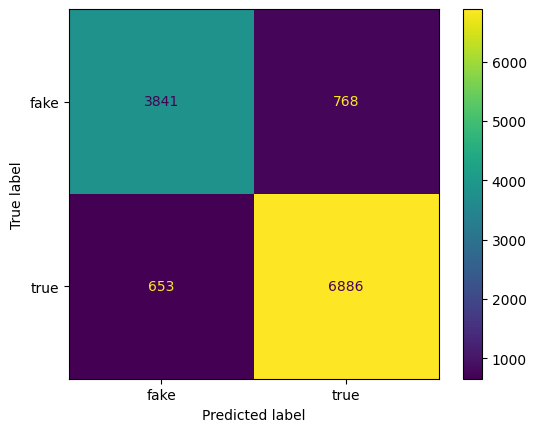

In [116]:
cm = confusion_matrix(y_test, lg_y_pred, labels=lr_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
plt.gcf().set_size_inches(15, 15)
disp.plot()
plt.show()

<li style=color:#38629C> 3,841 records are correctly categorized as True Negative (TN) </li>
<li style=color:#38629C> 6,886 records are correctly categorized as True Positive (TP)</li>

In [117]:
#Classification Report for the Logistic Regression
print("Logistic Regression => Classification Report:\n",classification_report(y_test, lg_y_pred))

Logistic Regression => Classification Report:
               precision    recall  f1-score   support

        fake       0.85      0.83      0.84      4609
        true       0.90      0.91      0.91      7539

    accuracy                           0.88     12148
   macro avg       0.88      0.87      0.88     12148
weighted avg       0.88      0.88      0.88     12148




<p style=color:#467200 ><b>2. K-Nearest Neighbors</b></p>


<p style=color:#38629C> <b>K-Nearest Neighbors</b> also belongs to supervised learning domain and have intense application in pattern recognition, data mining, and intrusion detection. KNN can be used for regression for classification algorithm. It is non-parametric and don’t make assumption on data distribution. It measures distance using either Euclidean distance, Minkowski distance or Manhattan distance algorithms.</p>
      <p>Benefits of KNN</p>
      <ul style=color:#38629C>
        <li>Easy to implement.</li>
        <li>Adapts Easily.</li>
        <li>Few Hyperparameters</li>
      </ul>
      <p>Disadvantages of KNN</p>
      <ul style=color:#38629C>
        <li>Does not scale .</li>
        <li>Curse of Dimensionality.</li>
        <li>Prone to Overfitting </li>
      </ul>

  
Resource Reference:

<ol style=color:#38629C>
<em>
  <li>https://www.geeksforgeeks.org/k-nearest-neighbours/</li>
  
</em>
</ol> 

In [118]:

# The StandardScaler step scales the features of the dataset to have unit variance (This is used for preprocessing)
# The 'n_neighbors' parameter specifies the number of neighbors to consider in KNN
knn_model = make_pipeline(StandardScaler(with_mean=False), KNeighborsClassifier(n_neighbors=5))

# The StandardScaler preprocesses the features by scaling them, and then KNeighborsClassifier is trained
knn_model.fit(X_tf_train, y_train)

# Predict the class labels for the test data using the trained model
knn_y_pred = knn_model.predict(X_tf_test)


In [119]:
print("KNN accuracy(%):", metrics.accuracy_score(y_test, knn_y_pred)*100)

KNN accuracy(%): 63.03918340467567


<Figure size 1500x1500 with 0 Axes>

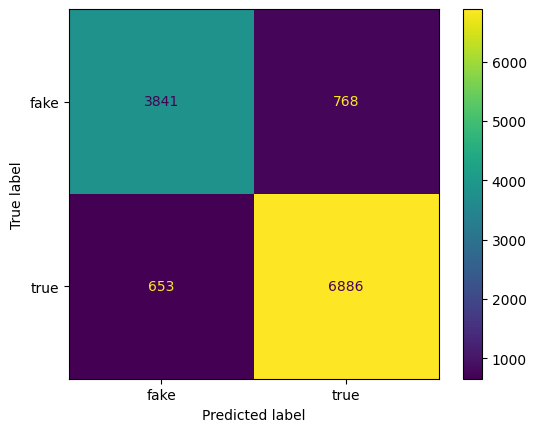

In [120]:
cm = confusion_matrix(y_test, lg_y_pred, labels=knn_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
plt.gcf().set_size_inches(15, 15)
disp.plot()
plt.show()

In [132]:
#Classification Report for KNN
print("K-Nearest Neighbor => Classification Report:\n",classification_report(y_test, knn_y_pred))

K-Nearest Neighbor => Classification Report:
               precision    recall  f1-score   support

        fake       0.68      0.05      0.09      4609
        true       0.63      0.99      0.77      7539

    accuracy                           0.63     12148
   macro avg       0.65      0.52      0.43     12148
weighted avg       0.65      0.63      0.51     12148




<p style=color:#467200 ><b>3. Multinomial Naive Bayes</b></p>


<p style=color:#38629C> <b>Naive Bayer</b> also belongs to supervised learning domain and effective in classification tasks. Multinomial Naive Bayes is used for the training. It brings many benefits over KNN or Logistic Regression as summarized below:</p>
      <ul style=color:#38629C>
        <li>Naive Bayes finds the probability of event based on knowledge or evidence.</li>
        <li>It is based on classification algorithm 'Bayes Theorem' to predict probability of data to particular class.</li>
        <li>Naive Bayes makes a simplifying assumption that the features are conditionally independent given the class label. </li>
        <li>Multinomial Naive Bayes is a specific variant of the Naive Bayes algorithm that's commonly used for text classification.It assumes that the feature vectors (usually representing word frequencies) follow a multinomial distribution.</li>
      </ul>
 
Resource Reference:

<ol style=color:#38629C>
<em>
  <li>https://www.geeksforgeeks.org/naive-bayes-classifiers/?ref=gcse</li>
  
</em>
</ol> 

In [122]:
# Importing Multinomial naive bayes from sklearn
from sklearn.naive_bayes import MultinomialNB
# Declaring a classifier
nb_model = MultinomialNB()
# Training a model
nb_model.fit(X_tf_train, y_train) # Term frequency is provided for training set

MultinomialNB()

In [123]:
import collections
# Testing model by providing testing dataset
y_pred_nb = nb_model.predict(X_tf_test)
# Checking count of true and fake news in model predictions
collections.Counter(y_pred_nb)

Counter({'true': 8244, 'fake': 3904})

In [124]:
# Checking the Accuracy of Model
from sklearn import metrics
print("Naive Bayes accuracy(%):", metrics.accuracy_score(y_test, y_pred_nb)*100)

Naive Bayes accuracy(%): 89.99835363845901


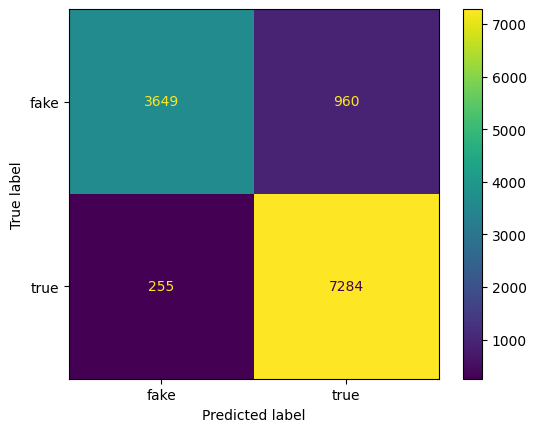

In [126]:
cm = confusion_matrix(y_test, y_pred_nb, labels=nb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)
disp.plot()
plt.show()

- 3,649 tweets are correctly categorized as True Negative (TN)
- 7,284 tweets are correctly categorized as True Positive (TP)

In [127]:
print("Multinomial Naive Bayes => Classification Report:\n",classification_report(y_test, y_pred_nb))

Multinomial Naive Bayes => Classification Report:
               precision    recall  f1-score   support

        fake       0.93      0.79      0.86      4609
        true       0.88      0.97      0.92      7539

    accuracy                           0.90     12148
   macro avg       0.91      0.88      0.89     12148
weighted avg       0.90      0.90      0.90     12148



<p style=color:#467200><b>ROC (Receiver Operating Characteristic Curve)</b></P>

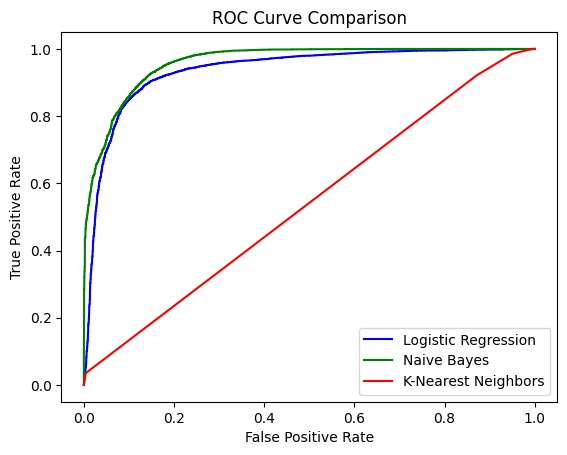

In [137]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def plot_roc_curves(models, model_labels, line_colors, X_test, y_test):
    """
    Plot ROC curves for multiple models on the same axes.

    Parameters:
        models (list): List of machine learning models to compare.
        model_labels (list): List of labels corresponding to each model for the legend.
        line_colors (list): List of colors for the ROC curves.
        X_test (array-like): Feature data for the test set.
        y_test (array-like): True labels for the test set (in the form {'fake', 'true'}).
    """

    # Map your labels to binary values (0 and 1)
    y_test_binary = [1 if label == 'true' else 0 for label in y_test]

    # Get the current axis (plotting area)
    ax = plt.gca()

    # Iterate through each model and plot its ROC curve with a specified color
    for model, color in zip(models, line_colors):
        # Calculate the ROC curve
        fpr, tpr, _ = roc_curve(y_test_binary, model.predict_proba(X_test)[:, 1])
        # Plot the ROC curve with the specified color
        plt.plot(fpr, tpr, color=color)

    # Add a title and labels to the plot
    plt.title("ROC Curve Comparison")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    # Set the legend with specified model labels and line colors
    legend_handles = [plt.Line2D([0], [0], color=color, label=label) for color, label in zip(line_colors, model_labels)]
    plt.legend(handles=legend_handles)

    # Show the plot
    plt.show()

# Example usage
plot_roc_curves([lr_model, nb_model, knn_model], ["Logistic Regression", "Naive Bayes", "K-Nearest Neighbors"], ["blue", "green", "red"], X_tf_test, y_test)


 <p style=color:#38629C>We can clearly notice that ROC Curves for Naive Bayer has higher accuracy in comparison to the Logistic Regression. This indicates that Naive Bayes performs better than Logistic Regression in classifying the fake news classification. Logistic Regression 's performance could potentially be improved by trying different parameters like regularization strength, number of iterations etc. However, Naive Bayes does have other advantages in comparison to the Logistic Regression such as the ability to have better understanding of the document because of having TF-IDF based feature extraction, requires less training data compared to logistic regression and is less prone to overfitting.</p>

<p style=color:#38629C> <b style=color:#467200 >Conclusion :</b> We have completed Traditional model training so far, Multinomial Naive Bayes model  has shown higher accuracy, precision and recall score and attained the first position in classifying the Fake news. The second best performing model was Logistic Regression and KNN is least accurate.</p>

|     Model | Precision    | Recall | F1-Score | Accuracy|
| -----------| ----------- | ----------- |----------- |----------- |
| Logistic Regression   | 0.85   | 0.83   | 0.84   | 0.88   |
| K-Nearest Neighbor  | 0.68   | 0.05  | 0.09   | 0.63  |
| Multinomial Naive Bayes | 0.93   | 0.79   | 0.86   | 0.90   |

<b style=color:#467200 >Next Step :</b> It is now confirmed that the `Multinomial Naive Bayes` is performing well among traditional machine learning  for classification of `real` and `fake` news. There is common assumption that the `Multinomial Naive Bayes` might not perform well against the deep learning model. Therefore, we will follow the below mentioned step for training a LSTM deep learning model for the same task and compare the performance.

*   Utilize the cleaned dataset created in this notebook for training and testing the LSTM model.
*   Define the LSTM model architecture with an embedding layer, LSTM layer and a Dense output layer with sigmoid activation using `Keras` deep learning library.
*   Compare the performance of the LSTM model with Multinomial Naive Bayes model trained earlier on validation set in terms of accuracy, precision, recall and F1 score.

Since, Deep learning models are complex to train and test, therefore, there is separate notebook created for training and evaluating the LSTM model named as `Final Project - Part 2 (LSTM)`. This Notebook is saved in the same directory and the link is mentioned below:

<i style=color:#38629C>Final-Project/Notebooks/Final Project - Part 2 (LSTM).ipynb</i>
